# Import Library

In [22]:
# from google.colab import drive
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.optimizers import Adam
# from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dataset

- Load Data


In [23]:
dataset_path = '../dataset/img'

- Augmentasi Data & Splitting Data Menjadi train, validation dan test

In [24]:
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest',
    brightness_range=[0.9, 1.1],
    validation_split = 0.2
    )

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical',
    subset = 'training',
    shuffle=True
)
val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size = (224,224),
    batch_size = 64,
    class_mode ='categorical',
    subset = 'validation',
    shuffle=False

)


print(train_gen.class_indices)
print(val_gen.class_indices)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


- Layer Convolutional Neural Network Scratch From Zero

In [4]:
model = Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax') 
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         7,453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 463,581 (1.77 MB)

 Trainable params: 462,621 (1.76 MB)

 Non-trainable params: 960 (3.75 KB)

In [26]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True,verbose=1)

In [ ]:
history = model.fit(train_gen,validation_data=val_gen,epochs=50, callbacks=[early_stop, reduce_lr])

d:\Capstone\Capstone Model\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2963 - loss: 2.3705

d:\Capstone\Capstone Model\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2175/2175 ━━━━━━━━━━━━━━━━━━━━ 3944s 2s/step - accuracy: 0.2964 - loss: 2.3702 - val_accuracy: 0.5819 - val_loss: 1.5274 - learning_rate: 0.0010
Epoch 2/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 3308s 2s/step - accuracy: 0.8427 - loss: 0.4780 - val_accuracy: 0.5915 - val_loss: 1.6475 - learning_rate: 0.0010
Epoch 3/50
1890/2175 ━━━━━━━━━━━━━━━━━━━━ 6:20 1s/step - accuracy: 0.9173 - loss: 0.2539

KeyboardInterrupt: 

- Layer Convolutional Neural Network Transfer Learning MobileNetV2

In [27]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze layer dulu
model_mobile = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')
])
model_mobile.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model_mobile.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 29)             │         7,453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,598,493 (9.91 MB)

 Trainable params: 337,949 (1.29 MB)

 Non-trainable params: 2,260,544 (8.62 MB)

In [28]:
history_mobile = model_mobile.fit(train_gen,validation_data=val_gen,epochs=50, callbacks=[early_stop, reduce_lr,checkpoint])

d:\Capstone\Capstone Model\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4455 - loss: 2.1085
Epoch 1: val_loss improved from inf to 0.81211, saving model to best_model.h5


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1682s 2s/step - accuracy: 0.4457 - loss: 2.1077 - val_accuracy: 0.7711 - val_loss: 0.8121 - learning_rate: 1.0000e-04
Epoch 2/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8559 - loss: 0.4849
Epoch 2: val_loss improved from 0.81211 to 0.60255, saving model to best_model.h5


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1597s 1s/step - accuracy: 0.8559 - loss: 0.4848 - val_accuracy: 0.8255 - val_loss: 0.6026 - learning_rate: 1.0000e-04
Epoch 3/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9080 - loss: 0.3022
Epoch 3: val_loss improved from 0.60255 to 0.55263, saving model to best_model.h5


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1587s 1s/step - accuracy: 0.9080 - loss: 0.3022 - val_accuracy: 0.8320 - val_loss: 0.5526 - learning_rate: 1.0000e-04
Epoch 4/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9314 - loss: 0.2230
Epoch 4: val_loss improved from 0.55263 to 0.51343, saving model to best_model.h5


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1587s 1s/step - accuracy: 0.9314 - loss: 0.2230 - val_accuracy: 0.8428 - val_loss: 0.5134 - learning_rate: 1.0000e-04
Epoch 5/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9441 - loss: 0.1768
Epoch 5: val_loss improved from 0.51343 to 0.50371, saving model to best_model.h5


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1583s 1s/step - accuracy: 0.9441 - loss: 0.1768 - val_accuracy: 0.8490 - val_loss: 0.5037 - learning_rate: 1.0000e-04
Epoch 6/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9521 - loss: 0.1559
Epoch 6: val_loss improved from 0.50371 to 0.47277, saving model to best_model.h5


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1584s 1s/step - accuracy: 0.9521 - loss: 0.1559 - val_accuracy: 0.8596 - val_loss: 0.4728 - learning_rate: 1.0000e-04
Epoch 7/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9567 - loss: 0.1325
Epoch 7: val_loss did not improve from 0.47277
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1585s 1s/step - accuracy: 0.9567 - loss: 0.1325 - val_accuracy: 0.8563 - val_loss: 0.4814 - learning_rate: 1.0000e-04
Epoch 8/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9628 - loss: 0.1185
Epoch 8: val_loss improved from 0.47277 to 0.45550, saving model to best_model.h5


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1587s 1s/step - accuracy: 0.9628 - loss: 0.1185 - val_accuracy: 0.8620 - val_loss: 0.4555 - learning_rate: 1.0000e-04
Epoch 9/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9662 - loss: 0.1094
Epoch 9: val_loss improved from 0.45550 to 0.44662, saving model to best_model.h5


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1582s 1s/step - accuracy: 0.9662 - loss: 0.1094 - val_accuracy: 0.8641 - val_loss: 0.4466 - learning_rate: 1.0000e-04
Epoch 10/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9696 - loss: 0.0961
Epoch 10: val_loss did not improve from 0.44662
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2002s 2s/step - accuracy: 0.9696 - loss: 0.0961 - val_accuracy: 0.8628 - val_loss: 0.4612 - learning_rate: 1.0000e-04
Epoch 11/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9713 - loss: 0.0885
Epoch 11: val_loss did not improve from 0.44662
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2174s 2s/step - accuracy: 0.9713 - loss: 0.0885 - val_accuracy: 0.8632 - val_loss: 0.4581 - learning_rate: 1.0000e-04
Epoch 12/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9739 - loss: 0.0801
Epoch 12: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 12: val_loss did not improve from 0.44662
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1902s 2s/step - accuracy: 0.9739 - l

1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1837s 2s/step - accuracy: 0.9771 - loss: 0.0724 - val_accuracy: 0.8754 - val_loss: 0.4327 - learning_rate: 5.0000e-05
Epoch 15/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9776 - loss: 0.0690
Epoch 15: val_loss did not improve from 0.43272
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1816s 2s/step - accuracy: 0.9776 - loss: 0.0690 - val_accuracy: 0.8732 - val_loss: 0.4337 - learning_rate: 5.0000e-05
Epoch 16/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9797 - loss: 0.0657
Epoch 16: val_loss did not improve from 0.43272
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1878s 2s/step - accuracy: 0.9797 - loss: 0.0657 - val_accuracy: 0.8729 - val_loss: 0.4353 - learning_rate: 5.0000e-05
Epoch 17/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9792 - loss: 0.0669
Epoch 17: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.

Epoch 17: val_loss did not improve from 0.43272
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1883s 2s/step - accuracy: 0.9792 - l

- Visualization about Accuracy and Val Accuracy

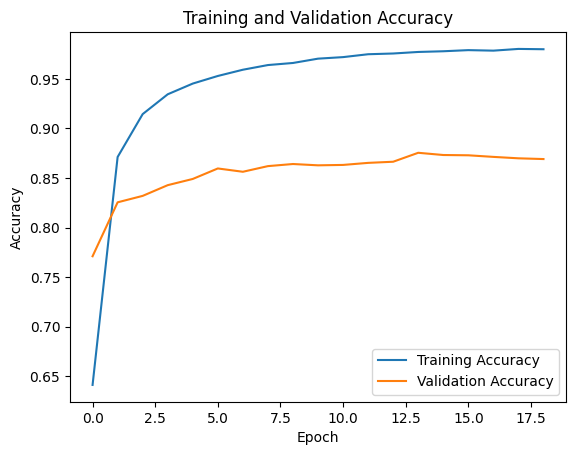

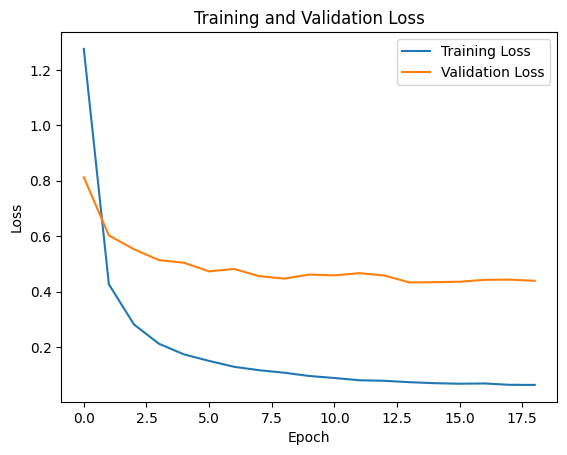

In [29]:
plt.plot(history_mobile.history['accuracy'], label = 'Training Accuracy')
plt.plot(history_mobile.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_mobile.history['loss'], label='Training Loss')
plt.plot(history_mobile.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

272/272 ━━━━━━━━━━━━━━━━━━━━ 342s 1s/step


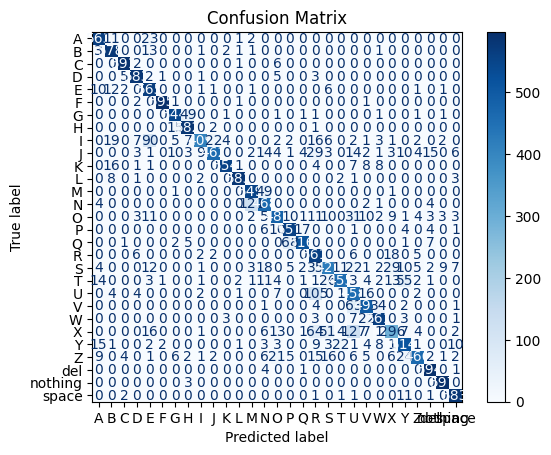

In [30]:
nb_samples= val_gen.samples

y_pred_net = model_mobile.predict(val_gen, steps=int(np.ceil(nb_samples/val_gen.batch_size)))
y_pred_classes = np.argmax(y_pred_net, axis=1)

y_true = val_gen.classes

cm = confusion_matrix(y_true, y_pred_classes)
class_names = list(val_gen.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:

file_path = "../dataset/asl_alphabet_test/A.jpg"  
# file_path = "./testwithmyhand/1.jpg"
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'delete', 'nothing', 'space']
img = image.load_img(file_path, target_size=(200, 200))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0
classes = model.predict(x)
predicted_class = np.argmax(classes, axis=1)[0]
print(f"Predicted Class: {labels[predicted_class]}")

# Export Model

- Export Model to Save Model

In [31]:
# model.export('../save_model/')
model_mobile.export('../save_model/')


INFO:tensorflow:Assets written to: ../save_model/assets


INFO:tensorflow:Assets written to: ../save_model/assets


Saved artifact at '../save_model/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_315')
Output Type:
  TensorSpec(shape=(None, 29), dtype=tf.float32, name=None)
Captures:
  2463543330416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2464691541568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2464691536992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2464691537520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2464691539808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2464691549664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2464691547904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2464691550720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2464691537168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2464691548960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2464691545616: TensorSpec(shape

- Export to tensorflowlite

In [33]:
converter = tf.lite.TFLiteConverter.from_saved_model('../save_model/')

tflite_model = converter.convert()

with open('../tflite_model/Model_SignLang.tflite','wb') as f:
    f.write(tflite_model)